# **1. Importacion de librerias**


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


# **2. Extraccion**

In [2]:
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
df_telecom = pd.read_json(url)
df_telecom

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [3]:
df_customer = pd.json_normalize(df_telecom['customer'])
df_phone = pd.json_normalize(df_telecom['phone'])
df_internet = pd.json_normalize(df_telecom['internet'])
df_account = pd.json_normalize(df_telecom['account'])
df_churn = df_telecom.drop(['customer', 'phone', 'internet', 'account'], axis=1)

In [4]:
df_customer,df_phone,df_internet,df_account

(      gender  SeniorCitizen Partner Dependents  tenure
 0     Female              0     Yes        Yes       9
 1       Male              0      No         No       9
 2       Male              0      No         No       4
 3       Male              1     Yes         No      13
 4     Female              1     Yes         No       3
 ...      ...            ...     ...        ...     ...
 7262  Female              0      No         No      13
 7263    Male              0     Yes         No      22
 7264    Male              0      No         No       2
 7265    Male              0     Yes        Yes      67
 7266    Male              0     Yes        Yes      63
 
 [7267 rows x 5 columns],
      PhoneService     MultipleLines
 0             Yes                No
 1             Yes               Yes
 2             Yes                No
 3             Yes                No
 4             Yes                No
 ...           ...               ...
 7262          Yes                No
 726

Diccionario de datos
* `customerID`: número de identificación único de cada cliente
* `Churn`: si el cliente dejó o no la empresa
* `gender`: género (masculino y femenino)
* `SeniorCitizen`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
* `Partner`: si el cliente tiene o no una pareja
* `Dependents`: si el cliente tiene o no dependientes
* `tenure`: meses de contrato del cliente
* `PhoneService`: suscripción al servicio telefónico
* `MultipleLines`: suscripción a más de una línea telefónica
* `InternetService`: suscripción a un proveedor de internet
* `OnlineSecurity`: suscripción adicional de seguridad en línea
* `OnlineBackup`: suscripción adicional de respaldo en línea
* `DeviceProtection`: suscripción adicional de protección del dispositivo
* `TechSupport`: suscripción adicional de soporte técnico, menor tiempo de espera
* `StreamingTV`: suscripción de televisión por cable
* `StreamingMovies`: suscripción de streaming de películas
* `Contract`: tipo de contrato
* `PaperlessBilling`: si el cliente prefiere recibir la factura en línea
* `PaymentMethod`: forma de pago
* `Charges.Monthly`: total de todos los servicios del cliente por mes
* `Charges.Total`: total gastado por el cliente


# **3. Transformación**


In [5]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
dtypes: object(2)
memory usage: 113.7+ KB


In [6]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   gender         7267 non-null   object
 1   SeniorCitizen  7267 non-null   int64 
 2   Partner        7267 non-null   object
 3   Dependents     7267 non-null   object
 4   tenure         7267 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 284.0+ KB


In [7]:
df_phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   PhoneService   7267 non-null   object
 1   MultipleLines  7267 non-null   object
dtypes: object(2)
memory usage: 113.7+ KB


In [8]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   InternetService   7267 non-null   object
 1   OnlineSecurity    7267 non-null   object
 2   OnlineBackup      7267 non-null   object
 3   DeviceProtection  7267 non-null   object
 4   TechSupport       7267 non-null   object
 5   StreamingTV       7267 non-null   object
 6   StreamingMovies   7267 non-null   object
dtypes: object(7)
memory usage: 397.5+ KB


In [9]:
df_account.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Contract          7267 non-null   object 
 1   PaperlessBilling  7267 non-null   object 
 2   PaymentMethod     7267 non-null   object 
 3   Charges.Monthly   7267 non-null   float64
 4   Charges.Total     7267 non-null   object 
dtypes: float64(1), object(4)
memory usage: 284.0+ KB


## **3.1 Comprobacion de incoherencia de datos**

### **Churn**

In [10]:
df_churn['customerID'].duplicated().value_counts()

,count
customerID,
False,7267


In [11]:
df_churn.isnull().sum()

,0
customerID,0
Churn,0


In [12]:
df_churn['Churn'].unique()

array(['No', 'Yes', ''], dtype=object)

In [13]:
df_churn.query('Churn == ""')

,customerID,Churn
30,0047-ZHDTW,
75,0120-YZLQA,
96,0154-QYHJU,
98,0162-RZGMZ,
175,0274-VVQOQ,
...,...,...
7158,9840-GSRFX,
7180,9872-RZQQB,
7211,9920-GNDMB,
7239,9955-RVWSC,


In [14]:
churn_values = df_churn['Churn'].value_counts()
churn_values

,count
Churn,
No,5174
Yes,1869
,224


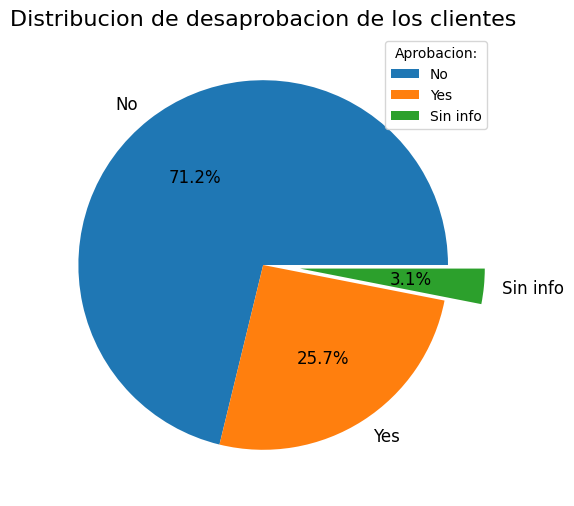

In [15]:
fig_churn_na , ax = plt.subplots(figsize=(6,6))
ax.pie(churn_values, labels= ['No','Yes','Sin info'], autopct='%1.1f%%', explode=(0,0,0.2), textprops={'fontsize': 12})
ax.set_title('Distribucion de desaprobacion de los clientes', fontsize=16, loc='center')
plt.legend(title  = 'Aprobacion:')

plt.show()

In [16]:
fig_churn_na.savefig('/content/distribucion_churn_na.png', bbox_inches='tight')


**Se considera eliminar los datos sin informacion dentro de la columna churn ya que seran usados en un futuro para comprobacion de un modelo predictivo, debido a la porcentaje menor a 5% de los datos totales**

---



In [17]:
drop_index = df_churn.query('Churn == ""').index
drop_index

Index([  30,   75,   96,   98,  175,  219,  312,  351,  368,  374,
       ...
       7058, 7061, 7062, 7143, 7155, 7158, 7180, 7211, 7239, 7247],
      dtype='int64', length=224)

In [18]:
df_churn.drop(drop_index, inplace=True)
df_customer.drop(drop_index, inplace=True)
df_phone.drop(drop_index, inplace=True)
df_internet.drop(drop_index, inplace=True)
df_account.drop(drop_index, inplace=True)


In [19]:
len(df_churn) == len(df_customer) == len(df_phone) == len(df_internet) == len(df_account)

True

**Comprobacion de clientes no duplicados**

---



In [20]:
df_churn['customerID'].duplicated().value_counts()

,count
customerID,
False,7043


In [21]:
pd.concat([df_churn,df_customer,df_phone,df_internet,df_account], axis=1).duplicated().value_counts()

,count
False,7043


### **Phone**

In [22]:
df_phone.isnull().sum()

,0
PhoneService,0
MultipleLines,0


In [23]:
df_phone['MultipleLines'].unique() ## Dato especial: No phone service

array(['No', 'Yes', 'No phone service'], dtype=object)

In [24]:
df_phone.value_counts()

PhoneService  MultipleLines   
Yes           No                  3390
              Yes                 2971
No            No phone service     682
Name: count, dtype: int64

In [25]:
df_phone['MultipleLines'].value_counts()

,count
MultipleLines,
No,3390
Yes,2971
No phone service,682


In [26]:
df_phone['PhoneService'].unique()

array(['Yes', 'No'], dtype=object)

### **Customer**

In [27]:
df_customer.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0


In [28]:
df_customer['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [29]:
df_customer['SeniorCitizen'].unique()

array([0, 1])

In [30]:
df_customer['Partner'].unique()

array(['Yes', 'No'], dtype=object)

In [31]:
df_customer['Dependents'].unique()

array(['Yes', 'No'], dtype=object)

In [32]:
df_customer['tenure'].unique()

array([ 9,  4, 13,  3, 71, 63,  7, 65, 54, 72,  5, 56, 34,  1, 45, 50, 23,
       55, 26, 69, 37, 49, 66, 67, 20, 43, 59, 12, 27,  2, 25, 29, 14, 35,
       64, 39, 40, 11,  6, 30, 70, 57, 58, 16, 32, 33, 10, 21, 61, 15, 44,
       22, 24, 19, 47, 62, 46, 52,  8, 60, 48, 28, 41, 53, 68, 31, 36, 17,
       18, 51, 38, 42,  0])

### **Internet**

In [33]:
df_internet.isnull().sum()

,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0
DeviceProtection,0
TechSupport,0
StreamingTV,0
StreamingMovies,0


In [34]:
df_internet['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [35]:
df_internet.query('InternetService == "No"').value_counts()

,,,,,,,count
InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,
No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,1526


In [36]:
df_internet['OnlineSecurity'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [37]:
df_internet.query('OnlineSecurity == "No internet service"').value_counts()

,,,,,,,count
InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,
No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,1526


In [38]:
df_internet['OnlineBackup'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [39]:
df_internet.query('OnlineBackup == "No internet service"').value_counts()

,,,,,,,count
InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,
No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,1526


In [40]:
df_internet['DeviceProtection'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [41]:
df_internet.query('DeviceProtection == "No internet service"').value_counts()

,,,,,,,count
InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,
No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,1526


In [42]:
df_internet['TechSupport'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [43]:
df_internet.query('TechSupport == "No internet service"').value_counts()

,,,,,,,count
InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,
No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,1526


In [44]:
df_internet['StreamingTV'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [45]:
df_internet.query('StreamingTV == "No internet service"').value_counts()

,,,,,,,count
InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,
No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,1526


In [46]:
df_internet['StreamingMovies'].unique() # Dato especial = No internet service

array(['No', 'Yes', 'No internet service'], dtype=object)

In [47]:
df_internet.query('StreamingMovies == "No internet service"').value_counts()

,,,,,,,count
InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,
No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,1526


### **Account**

In [48]:
df_account.isnull().sum()

,0
Contract,0
PaperlessBilling,0
PaymentMethod,0
Charges.Monthly,0
Charges.Total,0


In [49]:
df_account['Contract'].unique()

array(['One year', 'Month-to-month', 'Two year'], dtype=object)

In [50]:
df_account['PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)

In [51]:
df_account['PaymentMethod'].unique()

array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

In [52]:
df_account['Charges.Monthly'].unique()

array([65.6 , 59.9 , 73.9 , ..., 91.75, 68.8 , 67.85])

In [53]:
df_account['Charges.Total'].unique()

array(['593.3', '542.4', '280.85', ..., '742.9', '4627.65', '3707.6'],
      dtype=object)

In [54]:


mask = ~df_account['Charges.Total'].astype(str).str.fullmatch(r'\d+(\.\d+)?')
df_account[mask]

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
975,Two year,No,Credit card (automatic),56.05,
1775,Two year,No,Mailed check,20.00,
1955,Two year,Yes,Bank transfer (automatic),61.90,
2075,One year,Yes,Mailed check,19.70,
2232,Two year,No,Mailed check,20.25,
2308,Two year,No,Mailed check,25.35,
2930,Two year,No,Mailed check,73.35,
3134,Two year,No,Mailed check,25.75,
3203,Two year,Yes,Bank transfer (automatic),52.55,
4169,Two year,No,Mailed check,80.85,


## **Limpieza y tratamiento de datos**

### **Churn**

In [55]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7043 non-null   object
 1   Churn       7043 non-null   object
dtypes: object(2)
memory usage: 165.1+ KB


In [56]:
df_churn['Churn'] = df_churn['Churn'].map({'Yes': 1, 'No':0})

In [57]:
df_churn.drop('customerID', axis=1, inplace=True)

In [58]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Churn   7043 non-null   int64
dtypes: int64(1)
memory usage: 110.0 KB


### **Customer**

In [59]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   gender         7043 non-null   object
 1   SeniorCitizen  7043 non-null   int64 
 2   Partner        7043 non-null   object
 3   Dependents     7043 non-null   object
 4   tenure         7043 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 330.1+ KB


In [60]:
df_customer['Partner'] = df_customer['Partner'].map({'Yes': 1, 'No':0})

In [61]:
df_customer['Dependents'] = df_customer['Dependents'].map({'Yes': 1, 'No':0})

In [62]:
df_customer['gender'] = df_customer['gender'].astype('category')

In [63]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   gender         7043 non-null   category
 1   SeniorCitizen  7043 non-null   int64   
 2   Partner        7043 non-null   int64   
 3   Dependents     7043 non-null   int64   
 4   tenure         7043 non-null   int64   
dtypes: category(1), int64(4)
memory usage: 282.1 KB


### **Phone**

In [64]:
df_phone.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   PhoneService   7043 non-null   object
 1   MultipleLines  7043 non-null   object
dtypes: object(2)
memory usage: 165.1+ KB


In [65]:
df_phone['PhoneService'] = df_phone['PhoneService'].map({'Yes': 1, 'No':0})
df_phone['MultipleLines'] = df_phone['MultipleLines'].map({'Yes':1, 'No':0, 'No phone service':0})

In [66]:
df_phone.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   PhoneService   7043 non-null   int64
 1   MultipleLines  7043 non-null   int64
dtypes: int64(2)
memory usage: 165.1 KB


### **Internet**

In [67]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   InternetService   7043 non-null   object
 1   OnlineSecurity    7043 non-null   object
 2   OnlineBackup      7043 non-null   object
 3   DeviceProtection  7043 non-null   object
 4   TechSupport       7043 non-null   object
 5   StreamingTV       7043 non-null   object
 6   StreamingMovies   7043 non-null   object
dtypes: object(7)
memory usage: 440.2+ KB


In [68]:
columnas = list(df_internet.columns)

for i in columnas[1:]:
  df_internet[i] = df_internet[i].map({'Yes':1, 'No':0, 'No internet service':0})


In [69]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   InternetService   7043 non-null   object
 1   OnlineSecurity    7043 non-null   int64 
 2   OnlineBackup      7043 non-null   int64 
 3   DeviceProtection  7043 non-null   int64 
 4   TechSupport       7043 non-null   int64 
 5   StreamingTV       7043 non-null   int64 
 6   StreamingMovies   7043 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 440.2+ KB


### **Account**

In [70]:
df_account.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Contract          7043 non-null   object 
 1   PaperlessBilling  7043 non-null   object 
 2   PaymentMethod     7043 non-null   object 
 3   Charges.Monthly   7043 non-null   float64
 4   Charges.Total     7043 non-null   object 
dtypes: float64(1), object(4)
memory usage: 330.1+ KB


In [71]:
df_account['PaperlessBilling'] = df_account['PaperlessBilling'].map({'Yes':1, 'No':0})

In [72]:
df_account.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Contract          7043 non-null   object 
 1   PaperlessBilling  7043 non-null   int64  
 2   PaymentMethod     7043 non-null   object 
 3   Charges.Monthly   7043 non-null   float64
 4   Charges.Total     7043 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 330.1+ KB


In [73]:
df_account['Cuentas_diarias'] = df_account['Charges.Monthly'] / 30

In [74]:
df_account = df_account.rename(columns={'Charges.Monthly': 'ChargesMonthly', 'Charges.Total':'ChargesTotal'})

In [75]:
mask = ~df_account['ChargesTotal'].astype(str).str.fullmatch(r'\d+(\.\d+)?')
drop_index = df_account[mask].index

In [76]:
#df_account['ChargesTotal'] = df_account['ChargesTotal'].astype(np.float64)
df_account.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Contract          7043 non-null   object 
 1   PaperlessBilling  7043 non-null   int64  
 2   PaymentMethod     7043 non-null   object 
 3   ChargesMonthly    7043 non-null   float64
 4   ChargesTotal      7043 non-null   object 
 5   Cuentas_diarias   7043 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 385.2+ KB


In [77]:
df_account

,Contract,PaperlessBilling,PaymentMethod,ChargesMonthly,ChargesTotal,Cuentas_diarias
0,One year,1,Mailed check,65.60,593.3,2.186667
1,Month-to-month,0,Mailed check,59.90,542.4,1.996667
2,Month-to-month,1,Electronic check,73.90,280.85,2.463333
3,Month-to-month,1,Electronic check,98.00,1237.85,3.266667
4,Month-to-month,1,Mailed check,83.90,267.4,2.796667
...,...,...,...,...,...,...
7262,One year,0,Mailed check,55.15,742.9,1.838333
7263,Month-to-month,1,Electronic check,85.10,1873.7,2.836667
7264,Month-to-month,1,Mailed check,50.30,92.75,1.676667
7265,Two year,0,Mailed check,67.85,4627.65,2.261667


### **DataFrame limpio**

In [78]:
df_telecom_clean = pd.concat([df_churn,df_customer,df_phone,df_internet,df_account], axis=1)
df_telecom_clean.drop(index=drop_index, inplace=True)
df_telecom_clean['ChargesTotal'] = df_telecom_clean['ChargesTotal'].astype(np.float64)
df_telecom_clean

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,ChargesMonthly,ChargesTotal,Cuentas_diarias
0,0,Female,0,1,1,9,1,0,DSL,0,...,0,1,1,0,One year,1,Mailed check,65.60,593.30,2.186667
1,0,Male,0,0,0,9,1,1,DSL,0,...,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40,1.996667
2,1,Male,0,0,0,4,1,0,Fiber optic,0,...,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,2.463333
3,1,Male,1,1,0,13,1,0,Fiber optic,0,...,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,3.266667
4,1,Female,1,1,0,3,1,0,Fiber optic,0,...,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0,Female,0,0,0,13,1,0,DSL,1,...,0,1,0,0,One year,0,Mailed check,55.15,742.90,1.838333
7263,1,Male,0,1,0,22,1,1,Fiber optic,0,...,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70,2.836667
7264,0,Male,0,0,0,2,1,0,DSL,0,...,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75,1.676667
7265,0,Male,0,1,1,67,1,0,DSL,1,...,1,1,0,1,Two year,0,Mailed check,67.85,4627.65,2.261667


In [79]:
df_telecom_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Churn             7032 non-null   int64   
 1   gender            7032 non-null   category
 2   SeniorCitizen     7032 non-null   int64   
 3   Partner           7032 non-null   int64   
 4   Dependents        7032 non-null   int64   
 5   tenure            7032 non-null   int64   
 6   PhoneService      7032 non-null   int64   
 7   MultipleLines     7032 non-null   int64   
 8   InternetService   7032 non-null   object  
 9   OnlineSecurity    7032 non-null   int64   
 10  OnlineBackup      7032 non-null   int64   
 11  DeviceProtection  7032 non-null   int64   
 12  TechSupport       7032 non-null   int64   
 13  StreamingTV       7032 non-null   int64   
 14  StreamingMovies   7032 non-null   int64   
 15  Contract          7032 non-null   object  
 16  PaperlessBilling  7032 non-nu

# **4. Carga y Analisis**


In [80]:
df_telecom_clean.describe()

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,ChargesMonthly,ChargesTotal,Cuentas_diarias
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.265785,0.162400,0.482509,0.298493,32.421786,0.903299,0.421928,0.286547,0.344852,0.343857,0.290102,0.384386,0.388367,0.592719,64.798208,2283.300441,2.159940
std,0.441782,0.368844,0.499729,0.457629,24.545260,0.295571,0.493902,0.452180,0.475354,0.475028,0.453842,0.486484,0.487414,0.491363,30.085974,2266.771362,1.002866
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.587500,401.450000,1.186250
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1397.475000,2.345000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.862500,3794.737500,2.995417
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


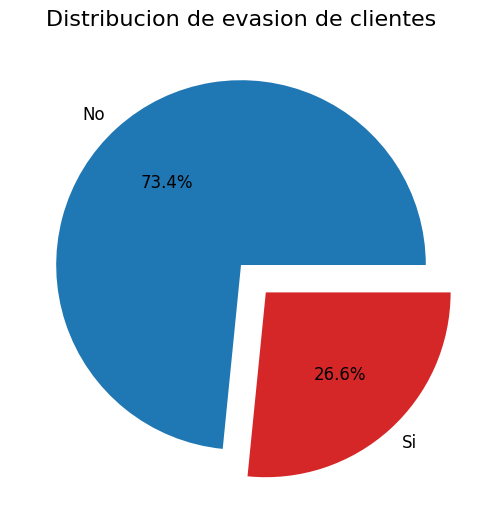

In [81]:
fig_churn , ax = plt.subplots(figsize=(6,6))
ax.pie(df_telecom_clean['Churn'].value_counts(),
       labels= ['No','Si'], autopct='%1.1f%%',
       explode=(0,0.2), textprops={'fontsize': 12},
       colors=['#1f77b4', '#d62728'])
ax.set_title('Distribucion de evasion de clientes', fontsize=16, loc='center')

plt.show()

In [82]:
fig_churn.savefig('/content/distribucion_churn.png', bbox_inches='tight')


In [83]:
def plot_distribucion(df, columns, hue='Churn', max_cols=3, title='',save_path=None):

    n_plots = len(columns)
    n_rows = (n_plots + max_cols - 1) // max_cols

    fig = plt.figure(figsize=(16, 4*n_rows))
    for i, col in enumerate(columns, 1):
        plt.subplot(n_rows, max_cols, i)
        ax = sns.countplot(data=df, x=col, hue=hue, palette=['#1f77b4', '#d62728'], edgecolor='black', linewidth=0.9)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        plt.title(f'Distribucion de {col} por Evasion')
        plt.ylabel('Cantidad de clientes')
        plt.xticks(rotation=45)

        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles=handles, labels=['No','Si'], title='Evasion')

        ax.set_ylim(0, 5000)

        for container in ax.containers:
          ax.bar_label(container, label_type='edge', fmt='%d', fontsize=10, color='black')
    plt.suptitle(title, fontsize=20, y=1.02)
    plt.tight_layout()

    if save_path:     # Guardar la figura
        fig.savefig(save_path, bbox_inches='tight')
    plt.show()


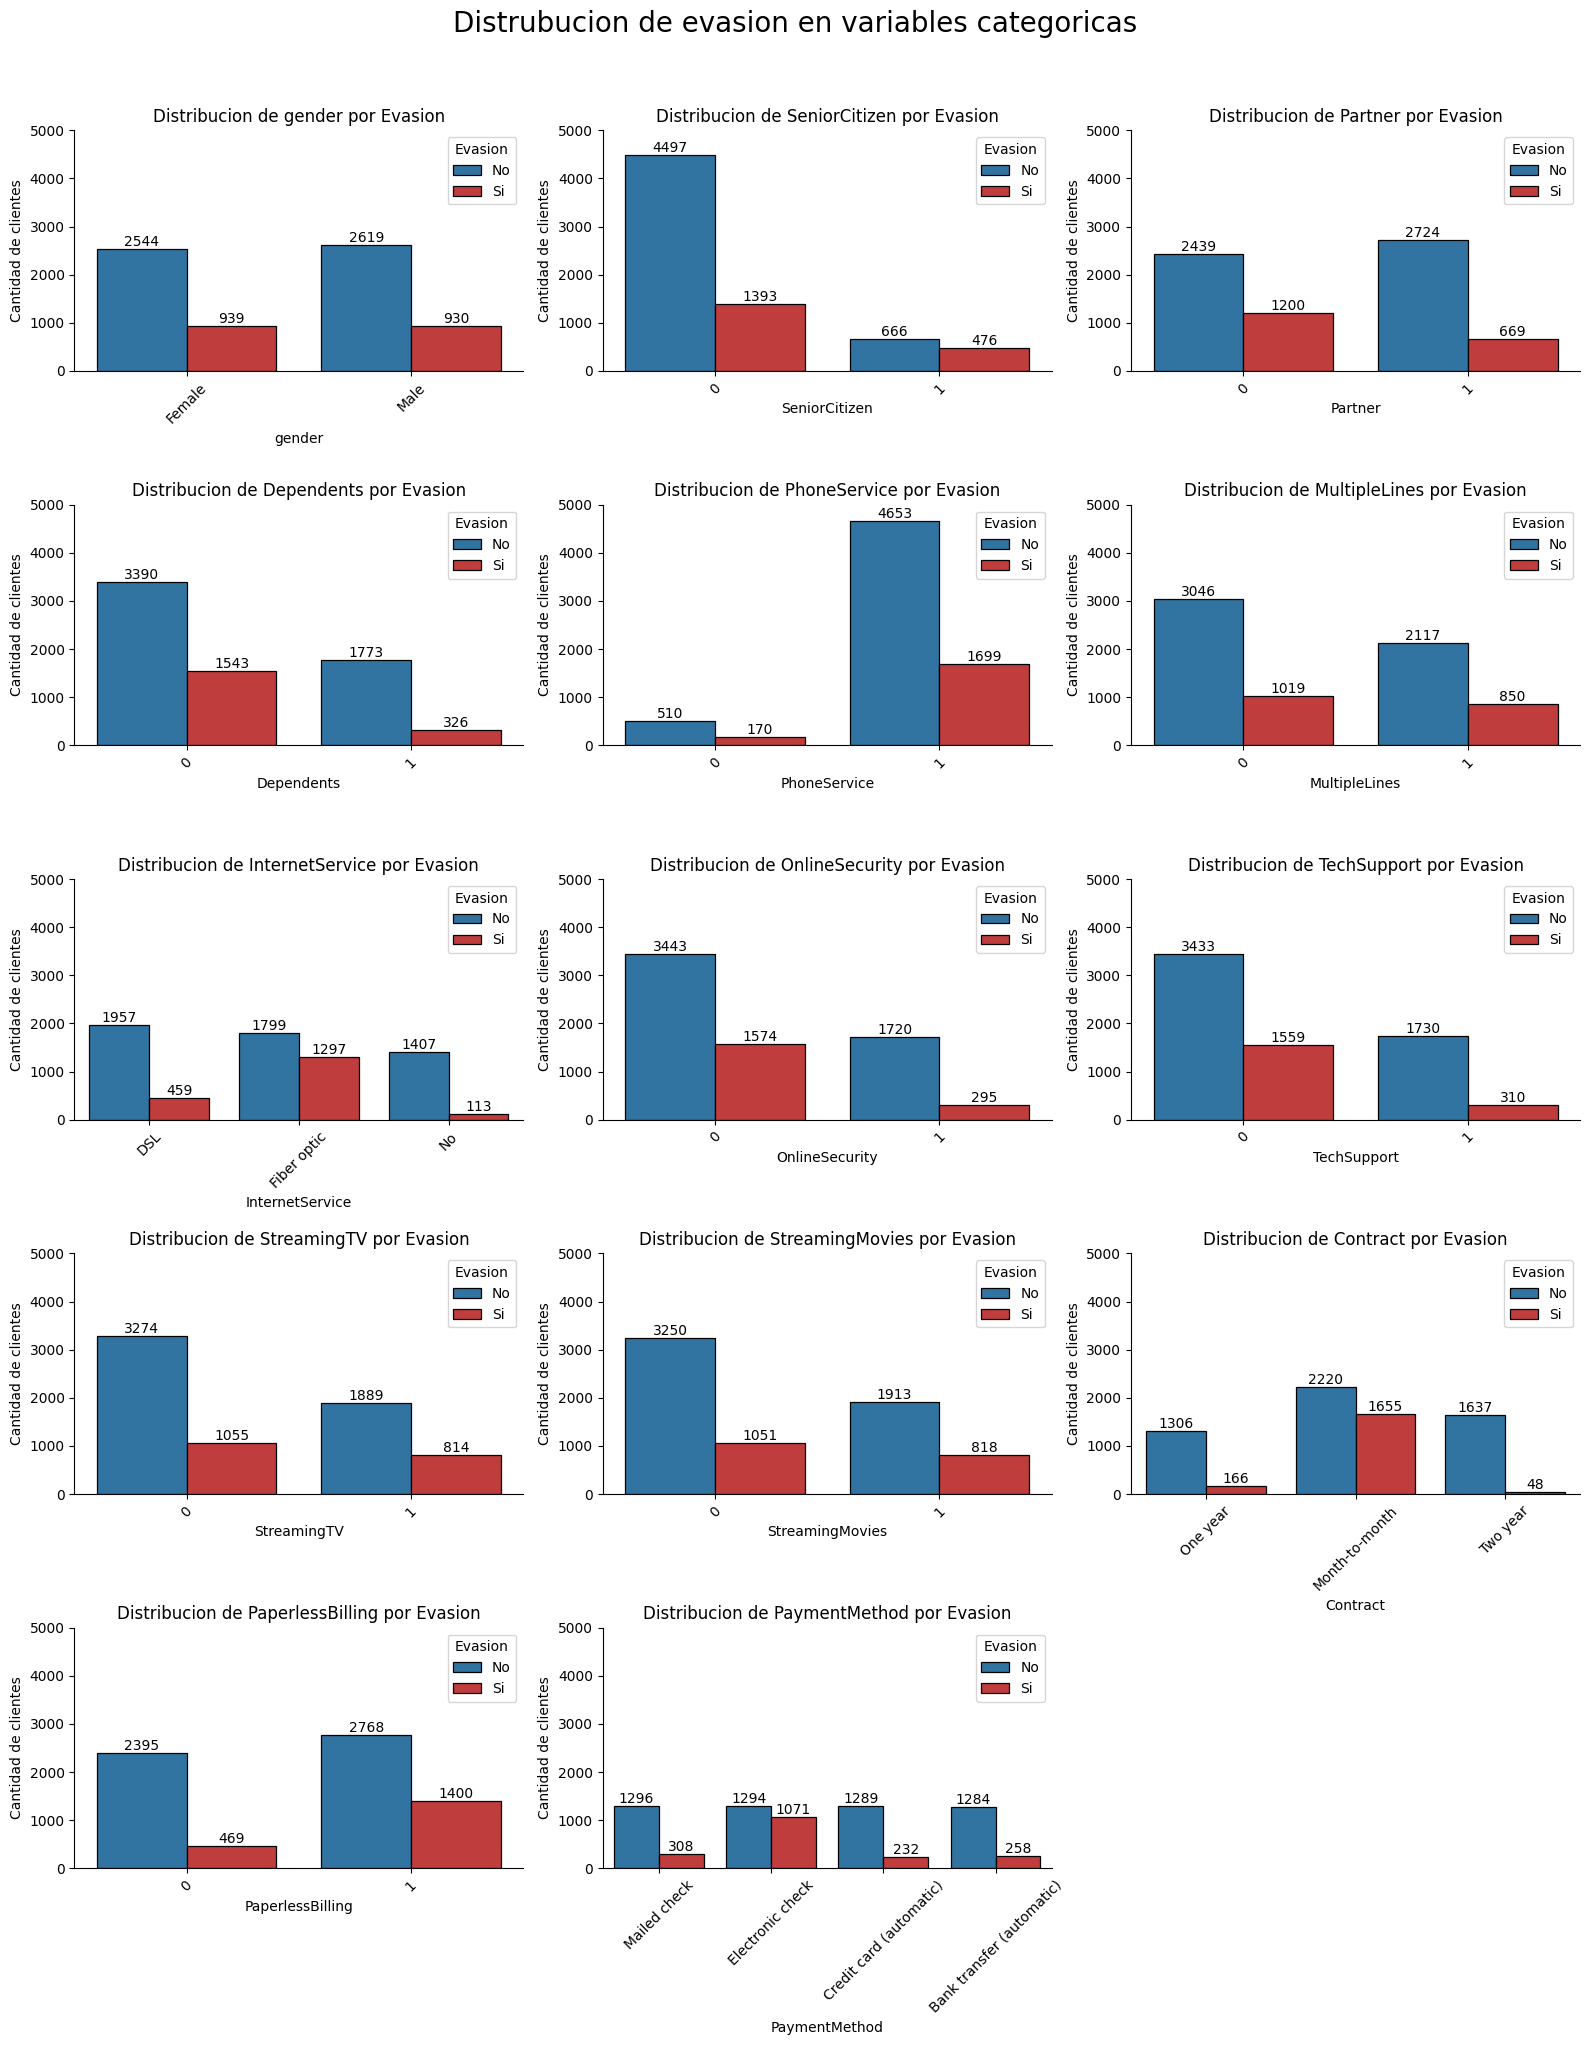

In [84]:
columnas = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',  'PaperlessBilling', 'PaymentMethod']
plot_distribucion(df_telecom_clean, columnas, title='Distrubucion de evasion en variables categoricas', save_path='/content/distribucion_evasion_categoricas')



In [85]:
def plot_segmento(df, columna):
  path = f'/content/distribucion_{columna}_categoricas'
  plot_distribucion(df, [columna], save_path = path)
  total_churn = len(df)
  conteo_total = df[columna].value_counts().rename('Distribución')
  churn_total = df[df['Churn'] == 1][columna].value_counts()
  tasa_evasion = (churn_total / total_churn * 100).round(2) #.astype(float) #astype(str) + '%'
  tasa_evasion.name = 'Tasa de Evasion (%)'

  resultado = pd.concat([conteo_total, tasa_evasion], axis=1)
  resultado = resultado.loc[tasa_evasion.sort_values(ascending=False).index].style.format({'Tasa de Evasion (%)': '{:.2f}%'}).background_gradient(cmap='coolwarm')
  print('\n')

  display(resultado)
  print('\n')


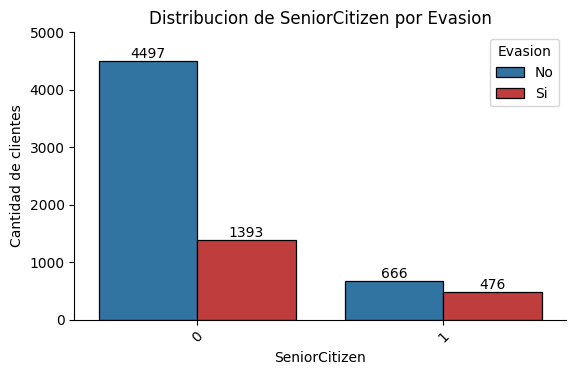

,Distribución,Tasa de Evasion (%)
SeniorCitizen,,
0,5890,19.81%
1,1142,6.77%


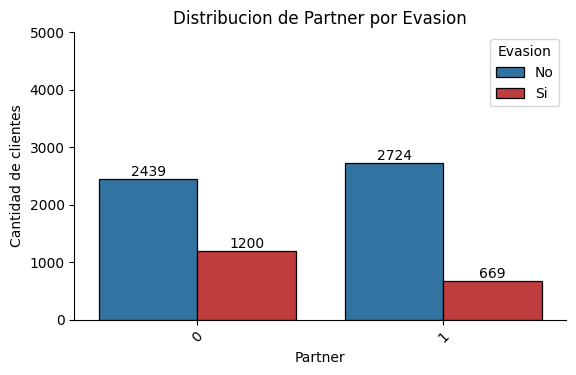

,Distribución,Tasa de Evasion (%)
Partner,,
0,3639,17.06%
1,3393,9.51%


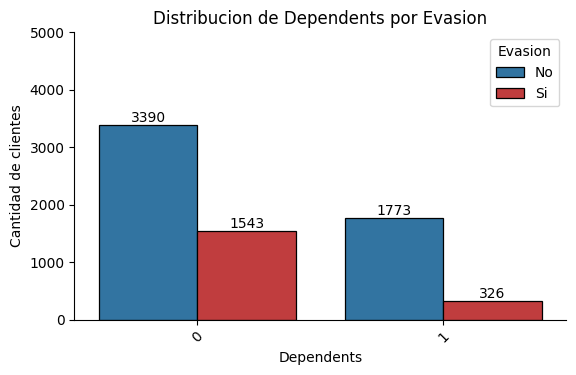

,Distribución,Tasa de Evasion (%)
Dependents,,
0,4933,21.94%
1,2099,4.64%


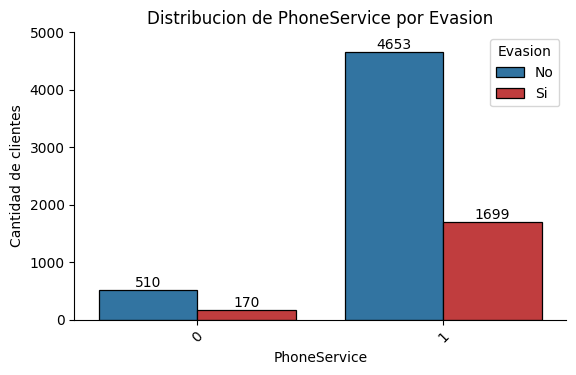

,Distribución,Tasa de Evasion (%)
PhoneService,,
1,6352,24.16%
0,680,2.42%


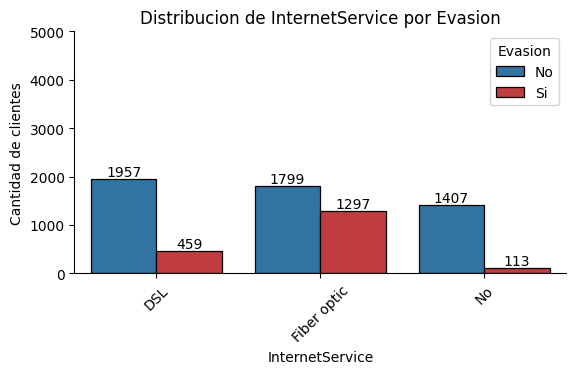

,Distribución,Tasa de Evasion (%)
InternetService,,
Fiber optic,3096,18.44%
DSL,2416,6.53%
No,1520,1.61%


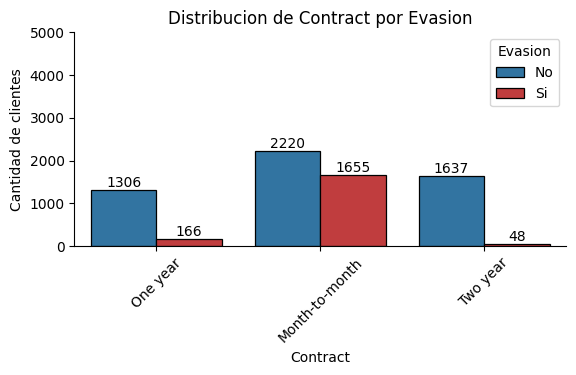

,Distribución,Tasa de Evasion (%)
Contract,,
Month-to-month,3875,23.54%
One year,1472,2.36%
Two year,1685,0.68%


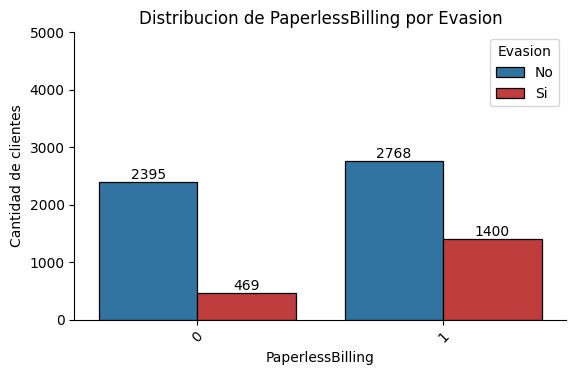

,Distribución,Tasa de Evasion (%)
PaperlessBilling,,
1,4168,19.91%
0,2864,6.67%


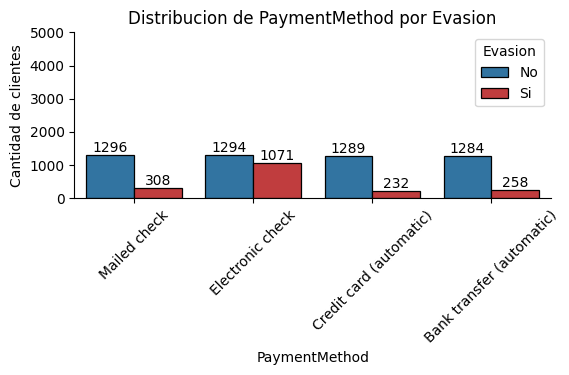

,Distribución,Tasa de Evasion (%)
PaymentMethod,,
Electronic check,2365,15.23%
Mailed check,1604,4.38%
Bank transfer (automatic),1542,3.67%
Credit card (automatic),1521,3.30%


In [86]:
columnas = ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'InternetService', 'Contract', 'PaperlessBilling', 'PaymentMethod']
for i in columnas:
  plot_segmento(df_telecom_clean, i)

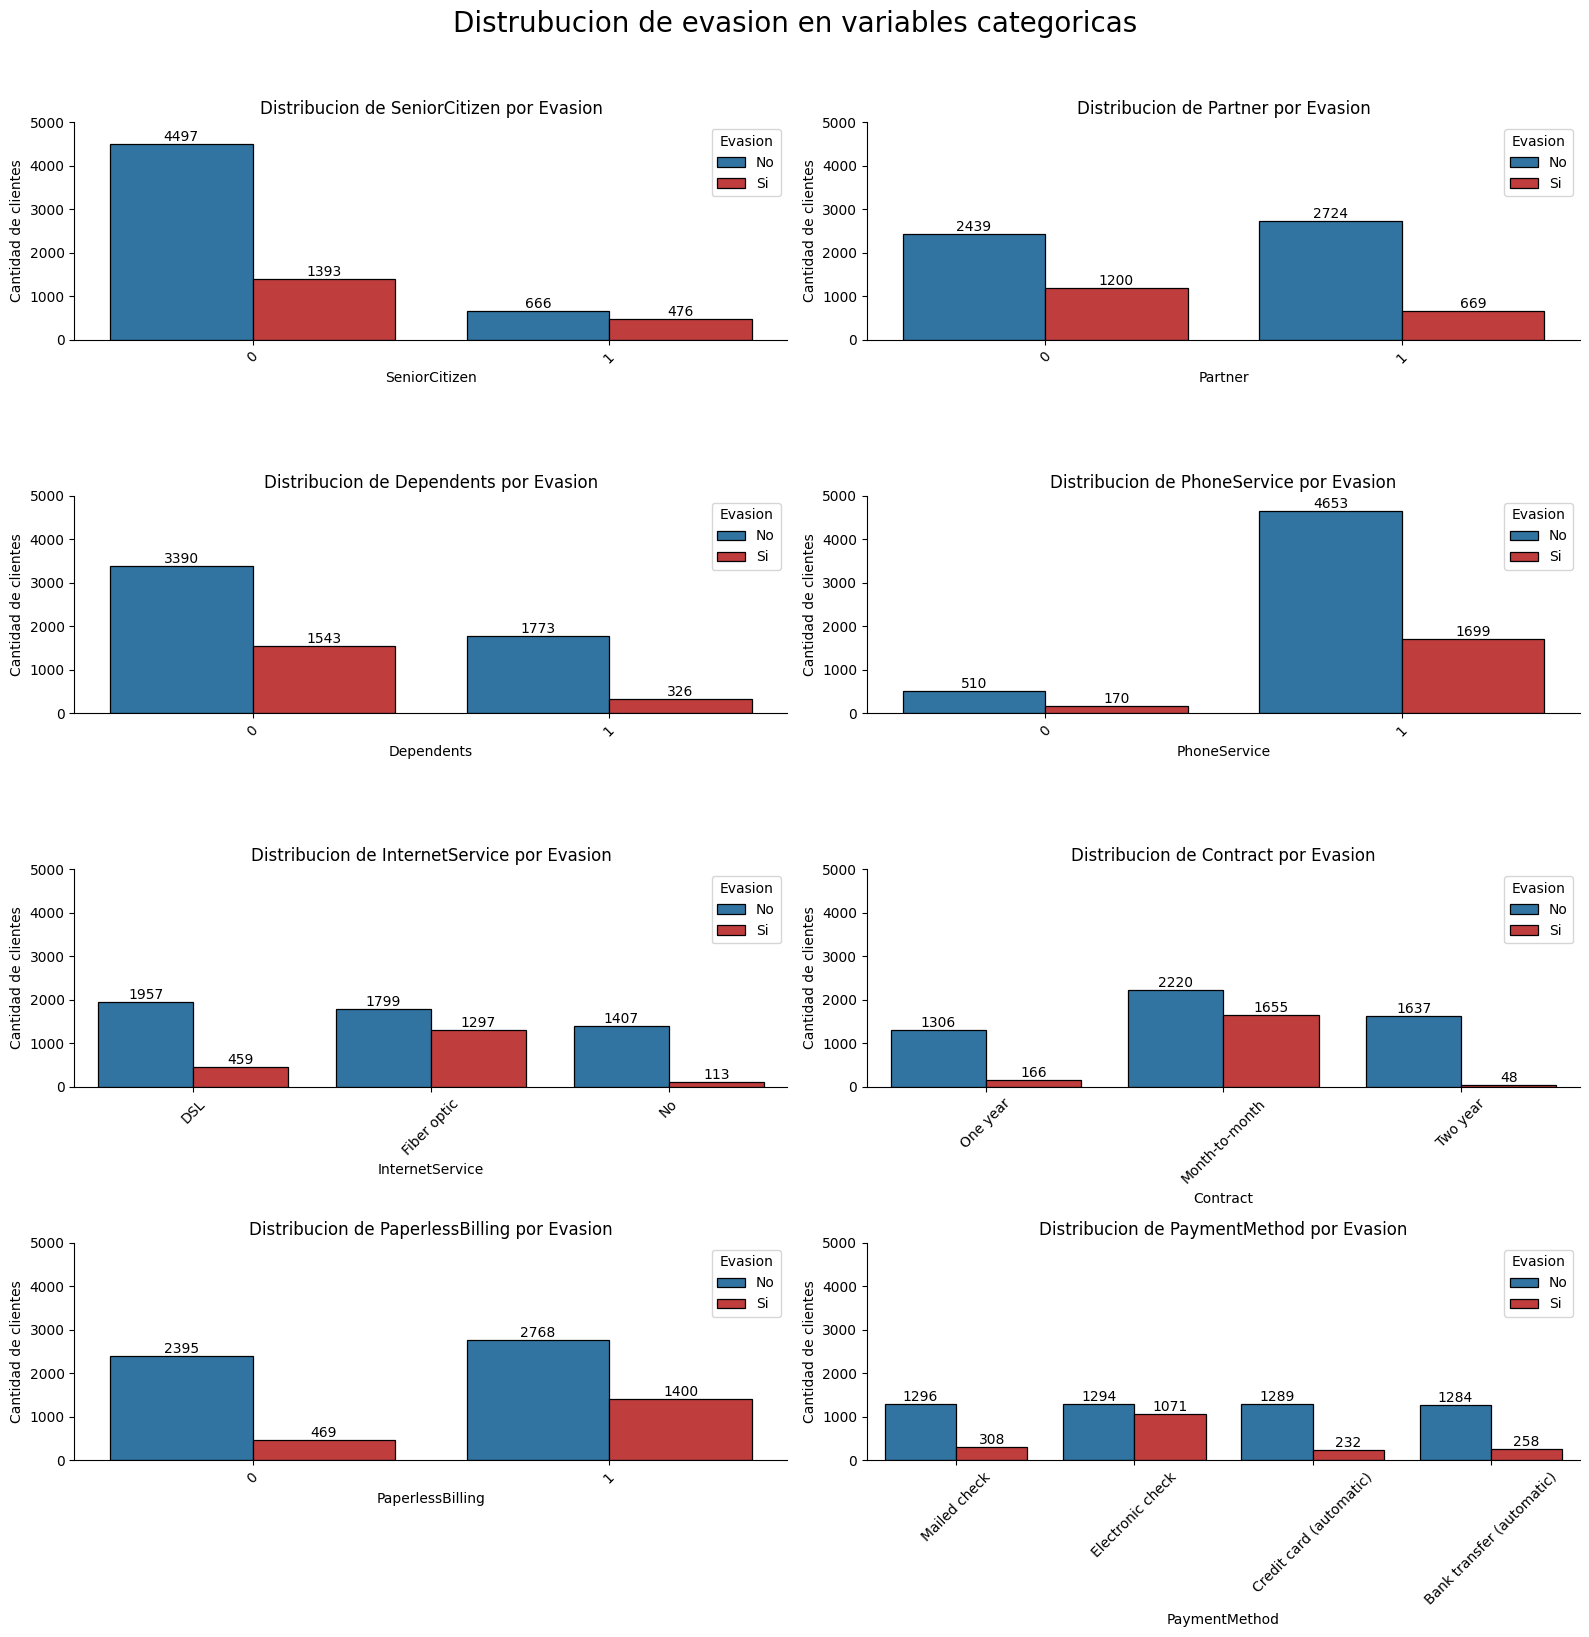

In [87]:
columnas = ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'InternetService', 'Contract', 'PaperlessBilling', 'PaymentMethod']
plot_distribucion(df_telecom_clean, columnas, title='Distrubucion de evasion en variables categoricas', max_cols=2)

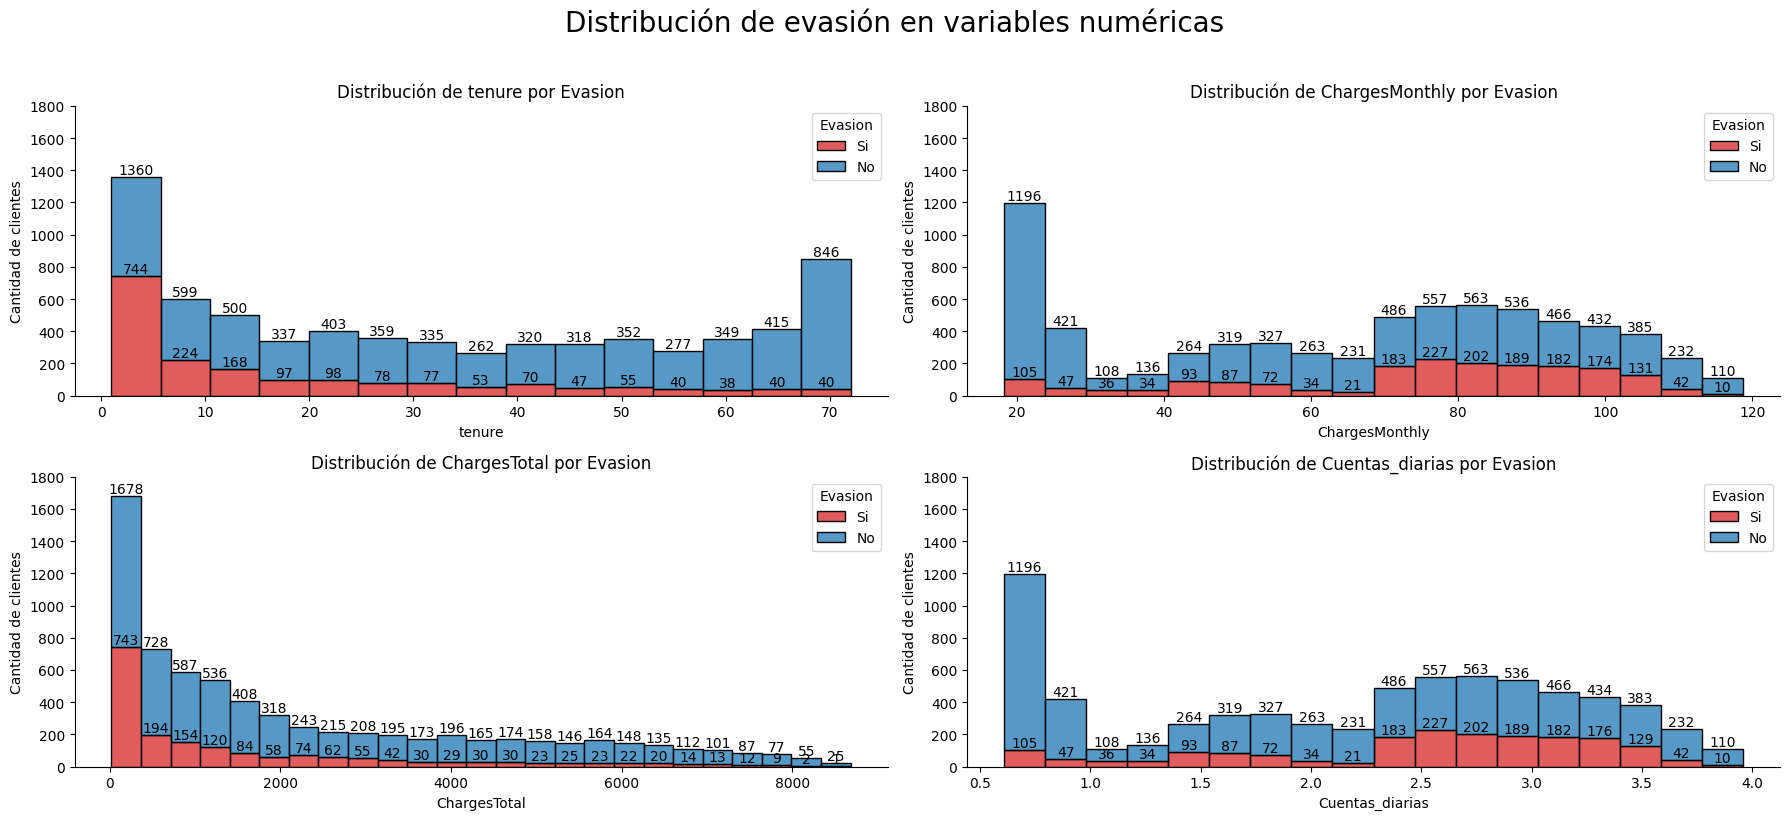

In [88]:
def plot_distribucion_numericas(df, columns, hue='Churn', max_cols=2, title='', save_path=None):
    n_plots = len(columns)
    n_rows = (n_plots + max_cols - 1) // max_cols

    fig = plt.figure(figsize=(18, 4*n_rows))
    for i, col in enumerate(columns, 1):
        plt.subplot(n_rows, max_cols, i)
        ax = sns.histplot(data=df, x=col, hue=hue, multiple="stack", palette=['#1f77b4', '#d62728'])
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        plt.title(f'Distribución de {col} por Evasion')
        plt.xlabel(col)
        plt.ylabel('Cantidad de clientes')
        plt.legend(title='Evasion', labels=['Si','No'])

        ax.set_ylim(0,1800)
        for container in ax.containers:
          ax.bar_label(container, label_type='edge', fmt='%d', fontsize=10, color='black')

    plt.suptitle(title, fontsize=20, y=1.02)
    plt.tight_layout()

    if save_path:
        fig.savefig(save_path, bbox_inches='tight')
    plt.show()

columnas_numericas = ['tenure', 'ChargesMonthly', 'ChargesTotal', 'Cuentas_diarias']
plot_distribucion_numericas(df_telecom_clean, columnas_numericas, title='Distribución de evasión en variables numéricas', save_path='/content/distribucion_evasion_numerica')


In [89]:
df_normalizado = df_telecom_clean.copy()

In [90]:
df_normalizado['gender'] = df_telecom_clean['gender'].map({'Female': 0, 'Male':1})
df_normalizado['InternetService'] = df_normalizado['InternetService'].map({'DSL': 1, 'Fiber optic':2, 'No':0})
df_normalizado['Contract'] = df_normalizado['Contract'].map({'One year': 1, 'Month-to-month':0, 'Two year':2})
df_normalizado['gender'] = df_normalizado['gender'].astype(np.int64)
df_normalizado['PaymentMethod'] = df_normalizado['PaymentMethod'].map({'Mailed check' : 0, 'Electronic check':1,
                                                                       'Credit card (automatic)':2,'Bank transfer (automatic)':3})

In [91]:
df_normalizado.corr().style.background_gradient(cmap='coolwarm')

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,ChargesMonthly,ChargesTotal,Cuentas_diarias
Churn,1.000000,-0.008545,0.150541,-0.149982,-0.163128,-0.354049,0.011691,0.040033,0.316350,-0.171270,-0.082307,-0.066193,-0.164716,0.063254,0.060860,-0.396150,0.191454,-0.107852,0.192858,-0.199484,0.192858
gender,-0.008545,1.000000,-0.001819,-0.001379,0.010349,0.005285,-0.007515,-0.008883,-0.009643,-0.016328,-0.013093,-0.000807,-0.008507,-0.007124,-0.010105,0.000095,-0.011902,-0.016942,-0.013779,0.000048,-0.013779
SeniorCitizen,0.150541,-0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.142996,0.259030,-0.038576,0.066663,0.059514,-0.060577,0.105445,0.119842,-0.141820,0.156258,0.038158,0.219874,0.102411,0.219874
Partner,-0.149982,-0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,0.142561,0.000938,0.143346,0.141849,0.153556,0.120206,0.124483,0.118108,0.294094,-0.013957,0.156232,0.097825,0.319072,0.097825
Dependents,-0.163128,0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.024307,-0.177789,0.080786,0.023639,0.013900,0.063053,-0.016499,-0.038375,0.240556,-0.110131,0.041989,-0.112343,0.064653,-0.112343
tenure,-0.354049,0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.332399,0.031272,0.328297,0.361138,0.361520,0.325288,0.280264,0.285402,0.676734,0.004823,0.370087,0.246862,0.825880,0.246862
PhoneService,0.011691,-0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,0.279530,0.094182,-0.091676,-0.052133,-0.070076,-0.095138,-0.021383,-0.033477,0.003019,0.016696,0.005499,0.248033,0.113008,0.248033
MultipleLines,0.040033,-0.008883,0.142996,0.142561,-0.024307,0.332399,0.279530,1.000000,0.345068,0.098592,0.202228,0.201733,0.100421,0.257804,0.259194,0.107529,0.163746,0.171240,0.490912,0.469042,0.490912
InternetService,0.316350,-0.009643,0.259030,0.000938,-0.177789,0.031272,0.094182,0.345068,1.000000,0.156493,0.307223,0.313420,0.164532,0.429616,0.426820,-0.288855,0.377644,0.119507,0.905389,0.428212,0.905389
OnlineSecurity,-0.171270,-0.016328,-0.038576,0.143346,0.080786,0.328297,-0.091676,0.098592,0.156493,1.000000,0.283285,0.274875,0.354458,0.175514,0.187426,0.245660,-0.004051,0.149112,0.296447,0.412619,0.296447


# **5. Informe final**

## **Introducción**

La empresa Telecom X esta presentando una alta tasa de evasión de clientes, el objetivo de este cuaderno es identificar las causas principales del problema; para este objetivo sera necesario recopilar, procesar, analizar los datos utilizando Python, para poder contribuir al equipo de Data Science a avanzar en modelos predictivos y estrategias para reducir la evasión


---



## **Limpieza y Tratamiento de datos**

  Para uso practico la limpieza y tratamiento de los datos se hace por separado en los siguientes dataframes:
*   df_customer
*   df_phone
*   df_internet
*   df_account
*   df_churn

---



Al comenzar a explorar los datos proporcionados validan que no hay datos nulos y duplicados; sin en cambio se observan inconsistencias donde se tienen  datos vacios en la columna Churn, se muestra en la siguiente grafica su distribucion de datos.

<img src=https://raw.githubusercontent.com/EJoelCM/Analisis_de_evasion_TelecomX/refs/heads/main/graficas/distribucion_churn_na.png >



Debido a que los datos sin informacion en la columna Churn son solo 3.1% se toma la decision de eliminarlo ya que despues podran ser utilizados para un modelo predictivo.
  
  
  Se observan datos binarios como `Female/Male` y `No/Yes`, para fines practicos para un modelo predictivo se consideraran los datos como `0/1` respectivamente en ambos casos, las columnas se trataran con tipo de dato `int64`. Los datos especiales como `No internet service` `No phone service` se considerara el mapeo con `0` al igual que el dato `No`.


---


Se debe considerar que para la tabla de correlacion los datos de las columnas categoricas con modificadas por datos enteros para su analisis, con el siguiente mapeo:

* **InternetService** `DSL: 1` - `Fiber optic: 2` - `No: 0`
* **Contract** `One year: 1` - `Month-tomonth: 0` - `Two year:2`
* **PaymentMethod** `Mailed check: 0` - `Electronic check: 1` - `Credit card (automatic): 2` - `Bank transfer (automatic): 3`



---

  Una vez tratado por separada cada data frame se concatena en uno solo con los datos ya corregidos listo para su analisis y visualización

## **Analisis Exploratorio de Datos**

Al momento de explorar los datos se detecta un total de 26.6% de clientes que cancelan el sevicio, lo cual se muestra en la siguiente grafica, lo que significa que al rededor de 1 de cada 4 personas esta cancelando. Durante el analisis nos vamos a concentrar en el analisis de esta parte de clientes.

<img src= https://raw.githubusercontent.com/EJoelCM/Analisis_de_evasion_TelecomX/refs/heads/main/graficas/distribucion_churn.png>



---




Para comprender mas los datos se concidera el siguiente diccionario de datos:

- `Churn`: si el cliente dejó o no la empresa
- `gender`: género (masculino y femenino)
- `SeniorCitizen`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- `Partner`: si el cliente tiene o no una pareja
- `Dependents`: si el cliente tiene o no dependientes
- `tenure`: meses de contrato del cliente
- `PhoneService`: suscripción al servicio telefónico
- `MultipleLines`: suscripción a más de una línea telefónica
- `InternetService`: suscripción a un proveedor de internet
- `OnlineSecurity`: suscripción adicional de seguridad en línea
- `OnlineBackup`: suscripción adicional de respaldo en línea
- `DeviceProtection`: suscripción adicional de protección del dispositivo
- `TechSupport`: suscripción adicional de soporte técnico, menor tiempo de espera
- `StreamingTV`: suscripción de televisión por cable
- `StreamingMovies`: suscripción de streaming de películas
- `Contract`: tipo de contrato
- `PaperlessBilling`: si el cliente prefiere recibir la factura en línea
- `PaymentMethod`: forma de pago
- `Charges.Monthly`: total de todos los servicios del cliente por mes
- `Charges.Total`: total gastado por el cliente


---



Con el fin de entender mejor los datos se analiza la distribucion en cada una de los datos categoricos, como se muestra en la siguiente grafica.

<img src= https://raw.githubusercontent.com/EJoelCM/Analisis_de_evasion_TelecomX/refs/heads/main/graficas/distribucion_evasion_categoricas.png>

Se detecta que la evasion esta distribuida sin mucha diferencia en casos como el genero, multiples lineas y servicio de TV; sin en cambio se detecta una diferencia considerable en las categorias pareja, tipo de contrato, tipo de facturacion, entre otras


---



Debido a que no hay un alza considerable en la evasión en datos con respecto  al genero, se considera que el motivo de cancelacion no es por el tipo de genero, por lo cual se segmentara el analisis en las siguientes caracteristicas:
* `SeniorCitizen`
* `Partner`
* `Dependents`
* `PhoneService`
* `InternetService`
* `Contract`
* `PaperlessBilling`
* `PaymentMethod`

En la siguiente gráfica podemos detectar que la mayor parte de la evasión es en usuarios menores a 65 años el cual representa el 19.81% de la tasa total de evasión.

<div style="display: flex; align-items: flex-start;">

  <img src="https://raw.githubusercontent.com/EJoelCM/Analisis_de_evasion_TelecomX/refs/heads/main/graficas/distribucion_SeniorCitizen_categoricas.png" width="50%">

  <img src="https://raw.githubusercontent.com/EJoelCM/Analisis_de_evasion_TelecomX/refs/heads/main/graficas/tabla_evasion_SeniorCitizen.png" width="45%" style="margin-left: 10px;">
</div>

Por lo que el analisis se consentrara en columnas con alto porcentaje de cancelaciones considerando el total de 26.6% como la mostrada anteriormente

<br>

---
<br>



Los clientes que no tienen pareja presentan un comportamiento similar ya que un 17.06% cancelo el servicio.

<div style="display: flex; align-items: flex-start;">

  <img src="https://raw.githubusercontent.com/EJoelCM/Analisis_de_evasion_TelecomX/refs/heads/main/graficas/distribucion_Partner_categoricas.png" width="50%">

  <img src="https://raw.githubusercontent.com/EJoelCM/Analisis_de_evasion_TelecomX/refs/heads/main/graficas/tabla_evasion_Partner.png" width="45%" style="margin-left: 10px;">
</div>
<br>

---
<br>

Por igual los clientes que no tienen personas que dependen de ellos presentan un alto porcentaje de cancelaciones el cual es 21.94%

<div style="display: flex; align-items: flex-start;">

  <img src="https://raw.githubusercontent.com/EJoelCM/Analisis_de_evasion_TelecomX/refs/heads/main/graficas/distribucion_Dependents_categoricas.png" width="50%">

  <img src="https://raw.githubusercontent.com/EJoelCM/Analisis_de_evasion_TelecomX/refs/heads/main/graficas/tabla_evasion_Dependents.png" width="45%" style="margin-left: 10px;">
</div>

<br>

---
 <br>

La concentracion dentro de los usuarios que tiene servicio de telefonia es considerable, se debe de tener en consideracion que la mayoria de las clientes cuentan con servicio de telefonia por lo que estaria ligado al total de clientes con el servicio.

<div style="display: flex; align-items: flex-start;">

  <img src="https://raw.githubusercontent.com/EJoelCM/Analisis_de_evasion_TelecomX/refs/heads/main/graficas/distribucion_PhoneService_categoricas.png" width="50%">

  <img src="https://raw.githubusercontent.com/EJoelCM/Analisis_de_evasion_TelecomX/refs/heads/main/graficas/tabla_evasion_PhoneService.png" width="45%" style="margin-left: 10px;">
</div>
<br>

---
 <br>

El comportamiento dentro de los clientes con servicio de internet se detecta diferente a los demas ya que al contar con dos tipos servicio como lo es la fibra optica y DSL, se detecta una concentracion mayor de cancelacion en los que tienen fibra optica.

<div style="display: flex; align-items: flex-start;">

  <img src="https://raw.githubusercontent.com/EJoelCM/Analisis_de_evasion_TelecomX/refs/heads/main/graficas/distribucion_InternetService_categoricas.png" width="50%">

  <img src="https://raw.githubusercontent.com/EJoelCM/Analisis_de_evasion_TelecomX/refs/heads/main/graficas/tabla_evasion_InternetService.png" width="45%" style="margin-left: 10px;">
</div>
<br>

---
 <br>

Al analizar el tipo de contrato se detecta una alza considerable de cancelaciones en el tipo de contrato mes por mes, teniendo un 23.54%

<div style="display: flex; align-items: flex-start;">

  <img src="https://raw.githubusercontent.com/EJoelCM/Analisis_de_evasion_TelecomX/refs/heads/main/graficas/distribucion_Contract_categoricas.png" width="50%">

  <img src="https://raw.githubusercontent.com/EJoelCM/Analisis_de_evasion_TelecomX/refs/heads/main/graficas/tabla_evasion_Contract.png" width="45%" style="margin-left: 10px;">
</div>
<br>

---
 <br>

En las siguientes graficas se puede detectar una preferencia de los usuarios ya que al recibir la factura por medio electronico y cheque electronico se presenta un 19.91%  y 15.23% de las cancelaciones respectivamente, considerando que es la mas utilizada por los clientes de detectara tambien un porcentaje alto en sus cancelaciones.

<div style="display: flex; align-items: flex-start;">

  <img src="https://raw.githubusercontent.com/EJoelCM/Analisis_de_evasion_TelecomX/refs/heads/main/graficas/distribucion_PaperlessBilling_categoricas.png" width="50%">

  <img src="https://raw.githubusercontent.com/EJoelCM/Analisis_de_evasion_TelecomX/refs/heads/main/graficas/tabla_evasion_PaperlessBilling.png" width="45%" style="margin-left: 10px;">
</div>


<div style="display: flex; align-items: flex-start;">

  <img src="https://raw.githubusercontent.com/EJoelCM/Analisis_de_evasion_TelecomX/refs/heads/main/graficas/distribucion_PaymentMethod_categoricas.png" width="50%">

  <img src="https://raw.githubusercontent.com/EJoelCM/Analisis_de_evasion_TelecomX/refs/heads/main/graficas/tabla_evasion_PaymentMethod.png" width="45%" style="margin-left: 10px;">
</div>

<br>

---
<br>


<img src=https://raw.githubusercontent.com/EJoelCM/Analisis_de_evasion_TelecomX/refs/heads/main/graficas/distribucion_evasion_numerica.png>

En la anterior grafica se puede observar el comportamiento de la evasion en variables numericas como es el caso de meses del contrato, cargos mensuales, cargos totales y cargos diarios.

Se puede detectar un comportamiento de cancelaciones en cargos mensuales altos a con contratos menores a 10 meses lo cual puede estar ligado al tipo de contrataciones de mes por mes que se tienen.

## **Conclusiones e Insights**

**1. Servicio de Internet**

Fibra optica cuenta con la mayor tasa de evasion (18.44%), por otra parte DSL presenta una menor cantidad total (6.53%). Aunque el servicio sea moderno hay varios parametros que pueden causar este inconveniente ya sea desde el precio, problemas con el material ya que es fragil o fallas generales en el servicio.

<br>

**2. Meses de Contrato**

Los clientes con menos meses de contrato tienen un comportamiento a cancelar en los primero meses, por lo que se detecta una falta de atencion en la retencion de clientes a una edad temprana del contrato.

<br>

**3. Tipo de Contrato**

El tipo de contrato mes por mes presenta la mayor parte de evasion por lo que podria considerarse una facilidad del cliente de finalizar el contrato cada que el mes finalice

<br>

**4. Facturacion y Metodo de Pago**

Estas dos caracteristicas nos indican una tendencia principal a tecnologia moderna, por lo que los pagos automatizados presentan la menor cantidad de evasiones totales.


## **Recomendaciones**

**1. Sistema de Retencion de Cuentas**

Diseñar un sistema de retencion temprana como incentivos a cuentas nuevas con beneficios exclusivos. Considerar un trato especializado para que el cliente no presente insatisfaccion

<br>

**2. Revicion en servicios con Fibra Optica**

Monitorear los clientes con este tipo de servicio mediante bandejas especializadas o encuestas de satisfaccion. Se considerara en mejorar el soporte tecnico remoto y presencial para mejorar la experiencia del cliente.

<br>

**3. Analizar el sector con mayor gasto**

Incentivar a los clientes a contratar mas servicios podria generar una falta a su pago de contrato, por lo que se recomienda analizar este sector para evitar el alto consumo y generar estrategias que se adecuen a las necesidades de cada cliente.

<br>

**4. Campañas de promociones en servicios adicionales**

Debido a que el menor concentrado de servicos cancelados es en cuentas con servicios adicionales como lo son soporte tecnico y servicio de seguridad online, podra considerarse fortalecer esos aspectos con clientes que aun no tienen esos servicios.

<br>

**5. Verificacion de contrato**

El tipo de contrato que se concentra mayor cancelacion de clientes es en el de mes por mes, por lo que se pueden generar estrategias que se tengan mas contratos con mayor duracion como el de un año y dos años y tener un seguimiento amplio con los clientes que presentan inconformidades durante este tiempo.